In [2]:
%%capture

# The line above suppresses output. If there are errors, remove it.
# Execute this cell once to install and update all needed packages. Could take a while, please wait until this process is finished before continuing.
# When the cell is finished, the [*] to the left of the cell turns into a number, e.g. [1].
import sys
!{sys.executable} -m pip install jupyter-rdfify
# The line below installs the python graphviz interface together with the grahpviz binaries.
# If you do not use anaconda, you need to install graphviz by hand and add it to your path as well as install the graphviz
# interface with pip (pip install graphviz)
!conda install --override-channels --yes --prefix {sys.prefix} -c conda-forge python-graphviz

In [3]:
%reload_ext jupyter-rdfify

C:\Users\Sanjida Ivy\AppData\Roaming\Python\Python312\site-packages\rdflib_jsonld\__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.0.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(


In [4]:
# This test cell will initialize the tests. All tests are hidden in this exercise.

### Attention! 
The cell below defines some prefixes which you may have to use throughout the tasks. You don't have to define them yourself. Execute it, otherwise subsequent cells won't work!

In [4]:
%%rdf turtle --prefix
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX ex: <http://example.org/#>

Turtle: Stored prefix.


# RDF Vocabulary: Collections
Another component of RDF vocabulary we haven't touched on yet are collections. A collection is a **closed list** of elements. Once a collection is defined, additional elements can't be added. Terms **rdf:first**, **rdf:rest** and **rdf:nil** are used. For example, to define a collection of last members of band The Beatles:

**ex:Beatles ex:lastMembers _:bn1 .  
_:bn1 rdf:first ex:JohnLennon .  
_:bn1 rdf:rest _:bn2 .  
_:bn2 rdf:first ex:PaulMcCartney .  
_:bn2 rdf:rest _:bn3 .  
_:bn3 rdf:first ex:GeorgeHarrison .  
_:bn3 rdf:rest _:bn4 .  
_:bn4 rdf:first ex:RingoStarr .  
_:bn4 rdf:rest rdf:nil .**

So every element of the collection is a blank node with an rdf:first property to the "value" of the element and an rdf:rest property to the next element. To close the collection, the rdf:rest property of the last element point to rdf:nil. Because this notation is very unreadable (even when using square brackets for blank nodes), there is syntactic sugar for defining collections. To define a collection we just write all its elements between parenthesis. 

For example, we define the above collection as follows:

**ex:Beatles ex:lastMembers ( ex:JohnLennon ex:PaulMcCartney ex:GeorgeHarrison ex:RingoStarr ) .**

This is much more readable and easier to write and follow. Use it whenever possible!

# Task 1: Fictional Characters [2 point]

Create a collection/list of following characters: 

- Fictional characters: http://example.org/#FictionalCharacters
- (contains) Characters: http://example.org/#characters
- Harry Potter: http://example.org/#HarryPotter
- Frodo Baggins: http://example.org/#FrodoBaggins
- Sherlock Holmes: http://example.org/#SherlockHolmes
- Princess Leia: http://example.org/#PrincessLeia
- James Bond: http://example.org/#JamesBond
- Wonder Woman: http://example.org/#WonderWoman
- Hannibal Lecter: http://example.org/#HannibalLecter
- Gandalf: http://example.org/#Gandalf

### Notes
- Even though lists have a fixed order, you can use any order you want as the tests will treat them as sets. 
- You can either define your own base prefix or simply execute the **%%rdf turtle --prefix** cell and it will store <http://example.org/#> as prefix "ex:".  

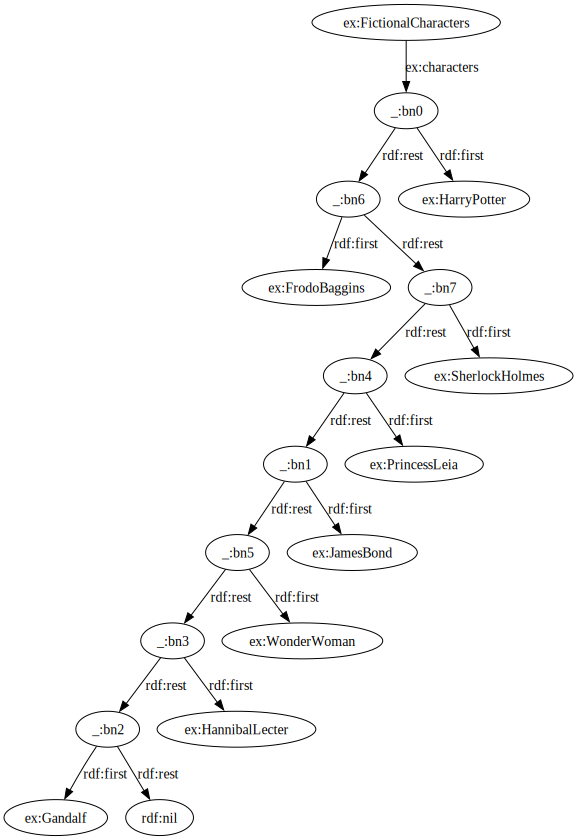

In [37]:
%%rdf turtle -l characters

@prefix ex: <http://example.org/#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

ex:FictionalCharacters ex:characters _:list .

_:list rdf:first ex:HarryPotter ;
       rdf:rest _:list1 .
_:list1 rdf:first ex:FrodoBaggins ;
        rdf:rest _:list2 .
_:list2 rdf:first ex:SherlockHolmes ;
        rdf:rest _:list3 .
_:list3 rdf:first ex:PrincessLeia ;
        rdf:rest _:list4 .
_:list4 rdf:first ex:JamesBond ;
        rdf:rest _:list5 .
_:list5 rdf:first ex:WonderWoman ;
        rdf:rest _:list6 .
_:list6 rdf:first ex:HannibalLecter ;
        rdf:rest _:list7 .
_:list7 rdf:first ex:Gandalf ;
        rdf:rest rdf:nil .

In [7]:
# This test will check whether your graph contains the list and it contains the correct resources. [2 point]

# Graph Modeling with OWL 2

Before, we used RDF Schema to write simple ontologies. These ontologies have the advantage that there are only a few rules, which makes an automated inference relatively efficient. But RDF Schema has very limited expressivity. For example we can't express that a class can only have a certain cardinality of a specific property or that a class is the intersection of two other classes.

The **Web Ontology Language (OWL)** is an ontology language like RDFS but can be used to model more complex concepts. OWL allows us to formulate expressions from **description logic** directly in RDF. As in RDFS, OWL defines three components: Individuals/Objects (concrete elements), Classes/Concepts (sets of objects) and Roles/Properties (which associate two individuals).

Most properties defined in the RDFS vocabulary can also be used when writing an ontology using OWL. For example **rdfs:subClassOf**, **rdfs:subPropertyOf**, **rdfs:range** and **rdfs:domain** can all be used together with OWL and have the same semantics.

For more information on certain topics please consult the [OWL 2 Primer](https://www.w3.org/TR/owl2-primer/). In [Section 1.2](https://www.w3.org/TR/2012/REC-owl2-primer-20121211/#OWL_Syntaxes) you can change the syntax of the examples to turtle.

### Classes

While **rdf:type** is used RDFS to declare that a resource belongs to a class, **owl:Class** is used in OWL2, which is the class of all classes. For example, to declare that a resource is a class, one can use the following triple:

**ex:Professor a owl:Class .**

**owl:Thing** is the class of everything (similar to rdfs:Resource) and **owl:Nothing** is the empty class. Both are predefined.

### Properties

OWL distinguishes between abstract roles, which are properties with resources as range, and concrete roles, which have a data type as range. The class of all abstract roles is **owl:ObjectProperty** and the class of all concrete roles is **owl:DatatypeProperty**. An example for both types of roles:

**ex:belongsTo a owl:ObjectProperty ;  
&nbsp;&nbsp;&nbsp;&nbsp;rdfs:range ex:Organisation .  
ex:firstName a owl:DatatypeProperty ;  
&nbsp;&nbsp;&nbsp;&nbsp;rdfs:range xsd:String .  
ex:ProfDecker ex:belongsTo ex:I5 .  
ex:ProfDecker ex:firstName "Stefan" .**

ex:belongsTo is an abstract role because it has the class ex:Organisation as range. ex:firstName is a concrete role as it has datatype xsd:String as range.

### Class Expressions

As in RDFS, we can use **rdfs:subClassOf** to define class hierarchies. To specify that two classes are equivalent (contain the same individuals), OWL defines the property **owl:equivalentClass**. To define that the classes ex:Dog and ex:Dogs are equivalent, one would add the following triple:

**ex:Dog owl:equivalentClass ex:Dogs .**

To specify that two classes are disjoint (an individual from one class cannot belong to the other class), OWL defines the property **owl:disjointWith**. To define that the classes ex:Dog and ex:Cat are disjoint, one would add the following triple:

**ex:Dog owl:disjointWith ex:Cat .**

There is another notation to easily specify pairwise disjointness of more than two classes. For this one uses the class **owl:AllDisjointClasses**, the property **owl:members** and a collection of classes in a blank node. To specify that ex:Dog, ex:Cat and ex:Horse are pairwise disjoint, one would add the following:

**\[ rdf:type owl:AllDisjointClasses;  
owl:members ( ex:Dog ex:Cat ex:Horse ) \] .**

### Property Expressions

Analogous to classes, we can define property hierarchies with **rdfs:subPropertyOf**, equivalent properties with **owl:equivalentProperty** and disjoint properties with **owl:propertyDisjointWith** (or **owl:AllDisjointProperties** and **owl:member**).

You can also specify that a property is the inverse of another property with **owl:inverseOf**. To define that ex:owns is the inverse of ex:ownedBy, one would add the following triple:

**ex:own owl:inverseOf ex:ownedBy .**

### Property Classes

In OWL there are also many classes to assign certain characteristics to properties. For example, to define that the property ex:knows is reflexive (everybody knows himself), one would use the class **owl:ReflexiveProperty**:

**ex:knows a owl:ReflexiveProperty .**

Here is a list of all property classes in OWL2:

[Reflexive](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_ReflexiveObjectProperty): **owl:ReflexiveProperty**  
[Irreflexive](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_IrreflexiveObjectProperty): **owl:IrreflexiveProperty**  
[Symmetric](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_SymmetricObjectProperty): **owl:SymmetricProperty**  
[Asymmetric](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_AsymmetricObjectProperty): **owl:AsymmetricProperty**  
[Transitive](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_TransitiveObjectProperty): **owl:TransitiveProperty**  
[Functional](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_FunctionalObjectProperty): **owl:FunctionalProperty**  
[Inverse Functional](http://www.w3.org/TR/2012/REC-owl2-primer-20121211/#a_InverseFunctionalObjectProperty): **owl:InverseFunctionalProperty**

Note: Concrete roles (owl:DatatypeProperty) can at most be functional.

### Assertions

OWL does not make the assumption that different URIs are automatically different individuals. For example, let's say we have the functional property ex:father (everyone can have at most one father -> functional) but we have the two triples:

**ex:Bart ex:father ex:Homer .  
ex:Bart ex:father ex:HomerSimpson .**

A reasoner that makes the unique-names assumption, would declare this graph as inconsistent because the ex:father property was earlier defined as functional (owl:FunctionalProperty). But an OWL reasoner does not make this assumption and instead infers that ex:Homer and ex:HomerSimpson are two names for the same individual. For this, OWL has two assertion properties, **owl:sameAs** and **owl:differentFrom**. To assert that ex:Homer and ex:HomerSimpson are the same person, one would add the following triple:

**ex:Homer owl:sameAs ex:HomerSimpson .**

In contrast, one would add the following triple to assert that ex:Homer (greek author) and ex:HomerSimpson (cartoon character) are not the same person:

**ex:Homer owl:differentFrom ex:HomerSimpson .**

As with owl:AllDisjointClasses and owl:AllDisjointProperties, you can easily declare that multiple resources are pairwise different with **owl:AllDifferent** and **owl:member**.

Note: owl:sameAs can be used on individuals and classes and means that two URIs are names for the same resource. owl:equivalentClass can only be used on classes and means that two classes contain the same individuals.

### Negative Property Assertions

Another type of assertion in OWL are negative property assertions. These types of assertions can be used to assert that a triple does not hold. The syntax for this assertion is similar to the syntax of RDF reification and uses the class **owl:NegativePropertyAssertion** as well as the three properties **owl:sourceIndividual**, **owl:assertionProperty** and **owl:targetIndividual** in a blank node. For example, to assert that ex:Homer (greek author) is **not** the father of ex:Bart, one would add the following triples:

**\[ a owl:NegativePropertyAssertion;  
owl:sourceIndividual ex:Bart;  
owl:assertionProperty ex:father;  
owl:targetIndividual ex:Homer \].**

Note that positive property assertions are just facts (simple triples).

# Task 2: Music, melody, and rhythm [5 points]
### Create an ontology about three main players in music world: lyricists, singers, and music directors using **OWL2** based on  following information:

- There are three classes: lyricists, singers, and music directors. 
- All music directors are singers (i.e., owl:equivalentClass) and vice versa. 
- A lyricist cannot be a singer or a music director and vice versa (i.e., owl:disjointWith). 
- To be directed by and being a creator (i.e., lyricist) are abstract roles (i.e., owl:ObjectProperty) and inverse of each other (i.e., owl:inverseOf). 
- A singer can only be directed by a music director (i.e., rdfs:domain).
- Only a lyricist can be a creator of a song (i.e., rdfs:domain). 

### Use the following URIs to model the ontology:  
- Music director: **http://example.org/#MusicDirector**  
- Singer: **http://example.org/#Singer**  
- Lyricist: **http://example.org/#Lyricist**  
- Creator of: **http://example.org/#creatorOf**  
- Directed by: **http://example.org/#directedBy**  

The test is carried out on the non-entailed graph. So, don't forget to explicitly assign/ classes (e.g., owl:Class) and define properties (e.g., owl:ObjectProperty). 

### Notes
- You can either define your own base prefix or simply execute the **%%rdf turtle --prefix** cell and it will store <http://example.org/#> as prefix **ex:**.  
- Even though some terms such as rdfs:domain and rdfs:range originate from RDFS vocabulary, they're still part of OWL2.
- You are allowed to use both OWL2 and RDFS terms/vocabularies. 

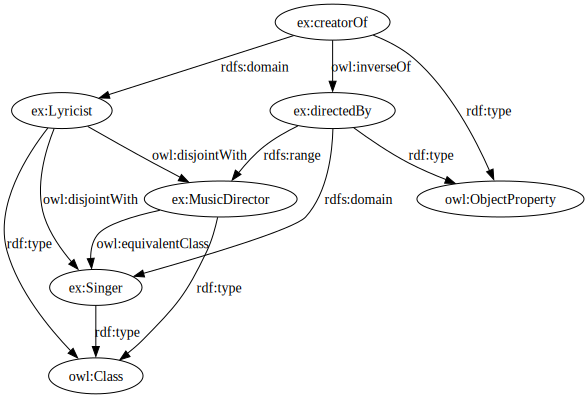

In [38]:
%%rdf turtle -l music

@prefix ex: <http://example.org/#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

# Declare the classes
ex:MusicDirector a owl:Class .
ex:Singer a owl:Class .
ex:Lyricist a owl:Class .

# All Music Directors are Singers, and vice versa
ex:MusicDirector owl:equivalentClass ex:Singer .

# Lyricist is disjoint with Singer and Music Director
ex:Lyricist owl:disjointWith ex:Singer .
ex:Lyricist owl:disjointWith ex:MusicDirector .

# Declare the object properties
ex:creatorOf a owl:ObjectProperty ;
    owl:inverseOf ex:directedBy ;
    rdfs:domain ex:Lyricist .

ex:directedBy a owl:ObjectProperty ;
    rdfs:domain ex:Singer ;
    rdfs:range ex:MusicDirector .

# Declare the classes for properties explicitly
ex:creatorOf a owl:ObjectProperty .
ex:directedBy a owl:ObjectProperty .

In [9]:
# This test will check whether you defined all classes and properties correctly. [2 point]

In [10]:
# This test will check whether you defined all domains correctly. [1 point]

In [11]:
# This test will check whether you defined class equivalence, disjoint, and inverse relations correctly. [2 point]

# Task 3: Biggest competitions in universities [8 points]

## (3a) Ontology of university competitions [6 points]
Academic institutions play a crucial role in the education and research landscape, often forming alliances and rivalries. This task focuses on creating an ontology that models and represents these relationships among academic institutions using OWL2.
Consider the following information to model the ontology:  

- Every individual within the ontology represents an academic institution. We are asking for two triples: Use **owl:Thing**, **owl:equivalentClass**, and **owl:Class**.

- The concept of having a strategic academic partner is represented by the property **http://example.org/#partnersWith**. This property is an ObjectProperty and reflexive.

- The concept of having a competetition is represented by the property **http://example.org/#competesWith**. This property is an ObjectProperty and reflexive.

- Academic institutions regularly collaborate with each other in various ways (ObjectProperty, Transistive, Symmetric), and this relationship is represented by the property **http://example.org/#collaboratesWith**. This property is a sub-property of the partnership property. This property is disjoint with the 'compete with' property.

- The concept of having an academic competitor is represented by the property **http://example.org/#hasAcademicCompetition**. This property is an ObjectProperty and a FunctionalProperty. This property is a sub-property of the competition property.

- The concept of having a best academic partner is represented by the property **http://example.org/#hasBestAcademicPartner**. This property is an ObjectProperty and a FunctionalProperty. This property is a sub-property of the collaboration property.


### Use the following URIs and OWL to model the ontology:  

- Academic Institution: **http://example.org/#AcademicInstitution**  
- Having a partnership: **http://example.org/#partnersWith**  
- Having a collaboration: **http://example.org/#collaboratesWith**  
- Having a competition: **http://example.org/#competesWith**  
- Having the best academic partner: **http://example.org/#hasBestAcademicPartner**  
- Having an academic competition: **http://example.org/#hasAcademicCompetition**  



### Notes
- You can either define your own base prefix or simply execute the **%%rdf turtle --prefix** cell and it will store <http://example.org/#> as prefix **ex:**.  
- The test is carried out on the non-entailed graph. So, don't forget to explicitly assign/ classes (e.g., owl:Class) and define properties (e.g., owl:ObjectProperty). 
- Even though some terms such as rdfs:domain and rdfs:range originate from RDFS vocabulary, they're still part of OWL2.
- You are allowed to use both OWL2 and RDFS terms/vocabularies, but do not use cardinality constraints!

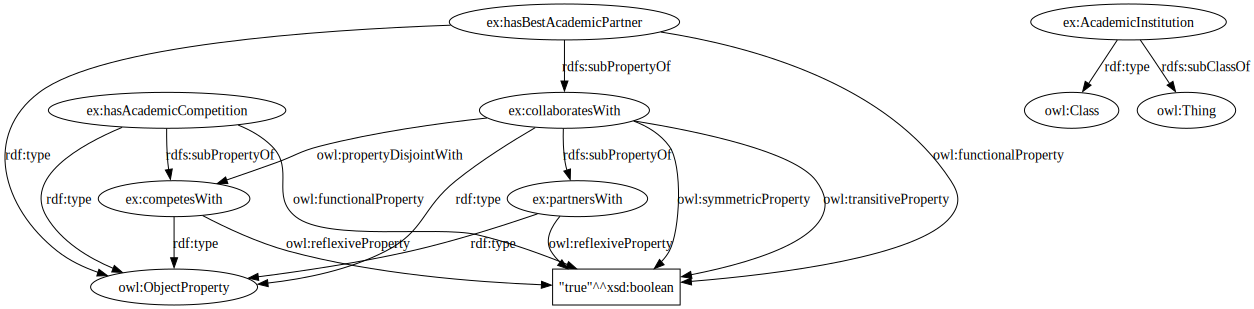

In [21]:
%%rdf turtle -l university
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex: <http://example.org/#> .

# Academic Institution class
ex:AcademicInstitution a owl:Class ;
    rdfs:subClassOf owl:Thing .

# partnersWith property (Reflexive)
ex:partnersWith a owl:ObjectProperty ;
    owl:reflexiveProperty true .

# competesWith property (Reflexive)
ex:competesWith a owl:ObjectProperty ;
    owl:reflexiveProperty true .

# collaboratesWith property (Transitive, Symmetric, Sub-property of partnersWith, Disjoint with competesWith)
ex:collaboratesWith a owl:ObjectProperty ;
    rdfs:subPropertyOf ex:partnersWith ;
    owl:transitiveProperty true ;
    owl:symmetricProperty true ;
    owl:propertyDisjointWith ex:competesWith .

# hasAcademicCompetition property (Functional, Sub-property of competesWith)
ex:hasAcademicCompetition a owl:ObjectProperty ;
    rdfs:subPropertyOf ex:competesWith ;
    owl:functionalProperty true .

# hasBestAcademicPartner property (Functional, Sub-property of collaboratesWith)
ex:hasBestAcademicPartner a owl:ObjectProperty ;
    rdfs:subPropertyOf ex:collaboratesWith ;
    owl:functionalProperty true .




In [12]:
# This test will check whether you defined all classes and properties correctly. [2 point]

In [13]:
# This test will check whether you defined all class and property relationships correctly. [2 point]

In [14]:
# This test will check whether you defined all property classes (Symmetry, Transitivity, etc.) correctly. [2 points]

## (3b) Simply competition or rivalry? [2 points]


### Using the ontology from 3a, assert the following facts in OWL2:

- Harvard, MIT, Stanford, UCBerkeley are Academic Institutions
- Harvard has Academic Competition with MIT 
- Stanford has Academic Competition with UCBerkeley
- Havard is the same as Havard University
- UCBerkeley is different from UCDavis
- Harvard has **no** AcademicCompetition with Yale. **Hint:** Have a look into NegativePropertyAssertion.

### Use the following URIs:  

- Harvard: **ex:Harvard**
- MIT: **ex:MIT**
- Stanford: **ex:Stanford**
- UC Berkeley: **ex:UCBerkeley**
- Academic Competition: **ex:hasAcademicCompetition**
- Harvard University: **ex:HarvardUniversity**
- UC Davis: **ex:UCDavis**
- Yale: **ex:Yale**

### Important notes: 

- You don't necessarily have to solve 3a in order to get points for 3b) and you may simply use the vocabulary in 3a. 
- You can either define your own base prefix or simply execute the **%%rdf turtle --prefix** cell and it will store <http://example.org/#> as prefix **ex:**.  
- You are allowed to use both OWL2 and RDFS terms/vocabularies.

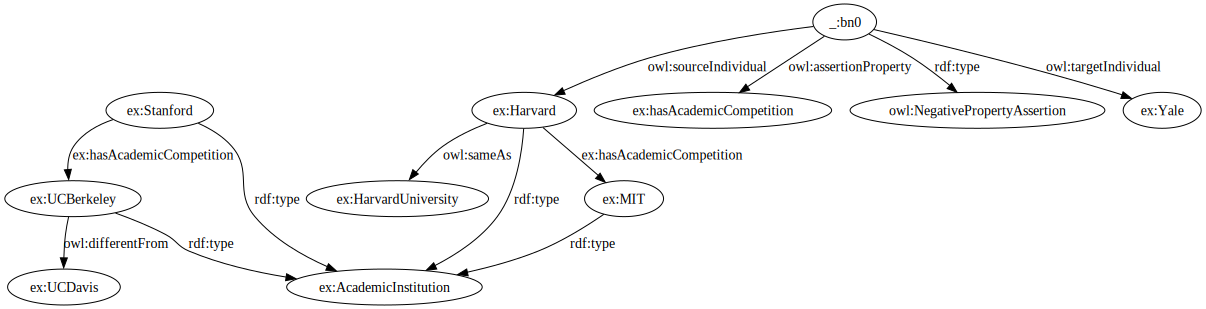

In [22]:
%%rdf turtle -l university_assert
@prefix ex: <http://example.org/#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

# Declaring individuals as Academic Institutions
ex:Harvard a ex:AcademicInstitution .
ex:MIT a ex:AcademicInstitution .
ex:Stanford a ex:AcademicInstitution .
ex:UCBerkeley a ex:AcademicInstitution .

# Harvard has an Academic Competition with MIT
ex:Harvard ex:hasAcademicCompetition ex:MIT .

# Stanford has an Academic Competition with UC Berkeley
ex:Stanford ex:hasAcademicCompetition ex:UCBerkeley .

# Harvard is the same as Harvard University
ex:Harvard owl:sameAs ex:HarvardUniversity .

# UC Berkeley is different from UC Davis
ex:UCBerkeley owl:differentFrom ex:UCDavis .

# Harvard has no Academic Competition with Yale
[ a owl:NegativePropertyAssertion ;
    owl:sourceIndividual ex:Harvard ;
    owl:assertionProperty ex:hasAcademicCompetition ;
    owl:targetIndividual ex:Yale
] .




In [16]:
# This test will check whether the first four assertions are correct. [1 point]

In [17]:
# This test will check whether the fourth assertion is correct. [1 point]

# Task 4 - OWL Complex Classes I [3 Points]

## Use OWL complex classes to define the following three classes in the context of a library system:


### The class of BorrowableItems is the same as all Books, Journals, or DVDs:

* BorrowableItems $\equiv$ (Books $\cup$ Journals $\cup$ DVDs)

### The class of ReferenceMaterial is the same as everything that is both a Book and not for lending:

* ReferenceMaterial $\equiv$ (Books $\cap$ LendingItems$^{C}$)

### The class of Multimedia contains at most the DVDs and AudioBooks:

* Multimedia $\subseteq$ (DVDs $\cup$ AudioBooks)

### Use the following URIs:

- BorrowableItems: http://example.org/#BorrowableItems
- ReferenceMaterial: http://example.org/#ReferenceMaterial
- Multimedia: http://example.org/#Multimedia
- Books: http://example.org/#Books
- Journals: http://example.org/#Journals
- DVDs: http://example.org/#DVDs
- AudioBooks: http://example.org/#AudioBooks
- LendingItems: http://example.org/#LendingItems


### For OWL, use the following vocabulary:
- Equivalent Class: owl:equivalentClass
- Class: owl:Class
- UnionOf: owl:unionOf
- IntersectionOf: owl:intersectionOf
- ComplementOf: owl:complementOf
- SubsetOf: rdfs:subClassOf

Only the above URIs (+Vocabulary) are necessary! You may also use all rdfs terms.

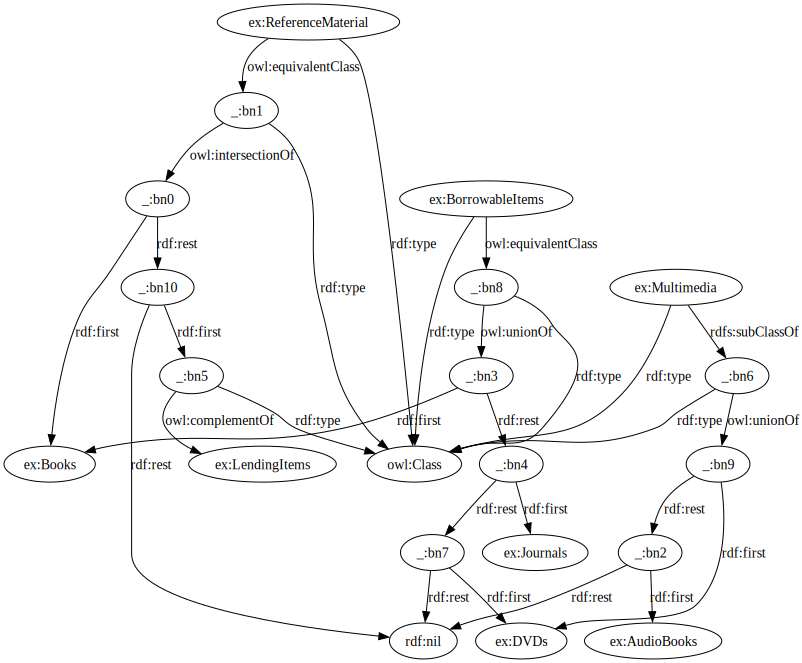

In [23]:
%%rdf turtle -l media
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex: <http://example.org/#> .

# BorrowableItems definition
ex:BorrowableItems a owl:Class ;
    owl:equivalentClass [
        a owl:Class ;
        owl:unionOf (
            ex:Books
            ex:Journals
            ex:DVDs
        )
    ] .

# ReferenceMaterial definition
ex:ReferenceMaterial a owl:Class ;
    owl:equivalentClass [
        a owl:Class ;
        owl:intersectionOf (
            ex:Books
            [ a owl:Class ; owl:complementOf ex:LendingItems ]
        )
    ] .

# Multimedia definition
ex:Multimedia a owl:Class ;
    rdfs:subClassOf [
        a owl:Class ;
        owl:unionOf (
            ex:DVDs
            ex:AudioBooks
        )
    ] .

In [20]:
# This test will check whether your BorrowableItems class is correct. [1 point]

In [21]:
# This test will check whether your forward class is correct. [1 point]

In [22]:
# This test will check whether your fieldplayer class is modelled correctly. [1 point]

# Task 5 - OWL Complex Classes II [4 Points]

### Use OWL complex classes and property restrictions to define the following two classes:

1. A car dealership is something which offers at least one vehicle. (Do not use cardinality restrictions for this)

2. Model the following two restrictions for individuals of type CarRental using cardinality restrictions.

The restrictions should both apply at the same time.

- A CarRental may at most offer 3 SUVs (Type: Non-negative).
- A CarRental may at most offer 10 Vans (Type: Non-negative).

### Use the following URIs:  
* Car Dealership: **http://example.org/#CarDealership**  
* Vehicle: **http://example.org/#Vehicle**  
* CarRental: **http://example.org/#CarRental**  
* SUV: **http://example.org/#SUV**  
* Van: **http://example.org/#Van**  
* offer: **http://example.org/#offer**
* non-negative: **xsd:nonNegativeInteger**

### For OWL, use the following vocabulary:
* owl:equivalentClass
* owl:Restriction
* owl:onProperty
* owl:someValuesFrom
* owl:Class
* owl:intersectionOf
* owl:onClass
* owl:maxQualifiedCardinality

Only the above URIs (+Vocabulary) are necessary! You may also use all rdfs terms.

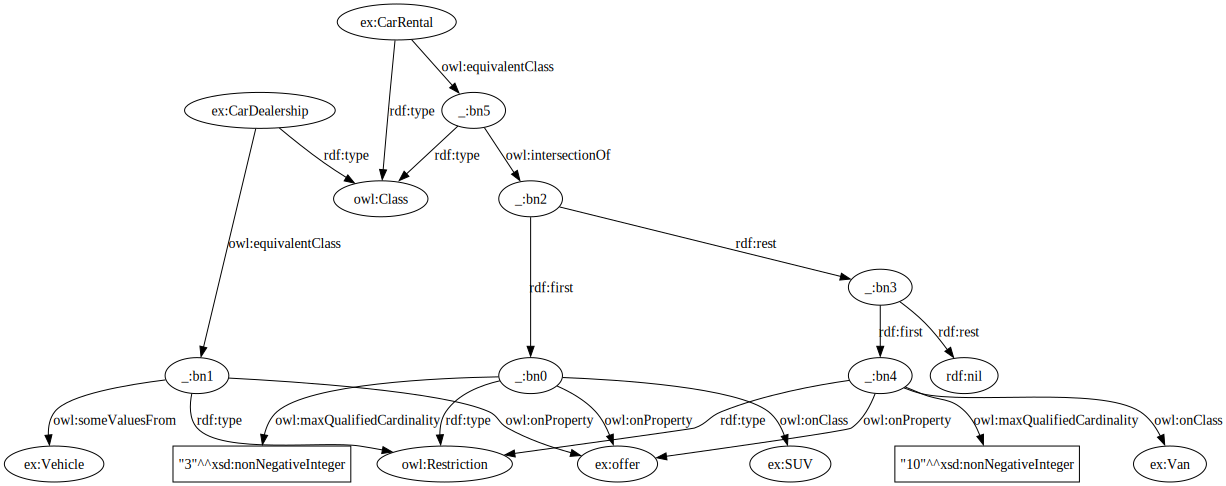

In [24]:
%%rdf turtle -l cars
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex: <http://example.org/#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Car Dealership definition
ex:CarDealership a owl:Class ;
    owl:equivalentClass [
        a owl:Restriction ;
        owl:onProperty ex:offer ;
        owl:someValuesFrom ex:Vehicle
    ] .

# CarRental definition
ex:CarRental a owl:Class ;
    owl:equivalentClass [
        a owl:Class ;
        owl:intersectionOf (
            [
                a owl:Restriction ;
                owl:onProperty ex:offer ;
                owl:onClass ex:SUV ;
                owl:maxQualifiedCardinality "3"^^xsd:nonNegativeInteger
            ]
            [
                a owl:Restriction ;
                owl:onProperty ex:offer ;
                owl:onClass ex:Van ;
                owl:maxQualifiedCardinality "10"^^xsd:nonNegativeInteger
            ]
        )
    ] .

In [24]:
# This test will check whether your CarDealership class is correct. [1.5 points]

In [25]:
# This test will check whether your CarRental class is correct. [2.5 points]